In [153]:
import numpy as np
import pandas as pd
from scipy.stats import ttest_ind
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv("data/checkout.csv")

data.head(20)

,Unnamed: 0,user_id,checkout_page,order_value,purchased,gender,browser,time_on_page
0,0,877621,A,29.410131,1.0,F,chrome,66.168628
1,1,876599,A,NaN,0.0,M,firefox,49.801887
2,2,905407,A,27.446845,1.0,M,chrome,56.744856
3,3,883562,A,30.602233,1.0,M,safari,71.890718
4,4,840542,A,29.668895,1.0,F,safari,67.410696
5,5,861142,A,22.556805,1.0,F,safari,33.272665
6,6,852680,A,27.375221,1.0,F,safari,56.401061
7,7,867863,A,NaN,0.0,M,safari,43.183714
8,8,873787,A,24.741953,1.0,M,safari,43.761374
9,9,890765,A,26.026496,1.0,M,safari,49.927182


In [154]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Dividir o dataset em priori e dados observados
prior_data, observed_data = train_test_split(data, test_size=0.02, random_state=42)

# Resumo das divisões
print(f"Tamanho dos dados para a priori: {prior_data.shape}")
print(f"Tamanho dos dados observados: {observed_data.shape}")

Tamanho dos dados para a priori: (8820, 8)
Tamanho dos dados observados: (180, 8)


In [155]:
def preprocessing_data(data):
    #Elimination Page C instances:
    data = data[data["checkout_page"] != "C"]
    
    print(data.info())
    
    data.fillna(0, inplace=True)
    
    
    checkout_page_count = data["checkout_page"].value_counts()
    print(f"The number of values by page: {checkout_page_count}")
    
    #Verifying the number of instances in single page:
    checkout_page_count = data.groupby("user_id")["checkout_page"].nunique().value_counts()
    print(checkout_page_count)
    
    #print(checkout_page_count / checkout_page_count.sum() *100)
    
    #Creating a dataset for single visitors:
    # Filtrando os usuários que visitaram apenas uma página de checkout
    clientes_uma_pagina = data.groupby("user_id")["checkout_page"].nunique()

    # Mantendo apenas os usuários que visitaram exatamente uma página de checkout
    clientes_uma_pagina = clientes_uma_pagina[clientes_uma_pagina == 1]

    # Filtrando o dataset original para manter apenas os usuários que visitaram uma página
    data_unique = data[data["user_id"].isin(clientes_uma_pagina.index)]

    # Exibindo o número de clientes que visitaram apenas uma página de checkout
    print(f"Número de clientes que visitaram apenas uma página de checkout: {data_unique['user_id'].nunique()}")
    
    #print(data_unique.head())
    
    # data_unique[data_unique["order_value"]==0]
    
    print(data_unique["checkout_page"].value_counts())
    
    sns.boxplot(data=data_unique, x="checkout_page", y="order_value")
    plt.show()
    
    all_stat = data_unique.groupby(by="checkout_page").agg({'user_id' : 'nunique',
                                                 'order_value' : ["sum", "mean", "median", "std", 'count']})

    print(pd.DataFrame(all_stat))
    
    page_a_order_value = data_unique[data_unique["checkout_page"] == "A"]["order_value"]
    #print(page_a_order_value.head())
    
    page_b_order_value = data_unique[data_unique["checkout_page"] == "B"]["order_value"]
    #print(page_b_order_value.head())
    
    mean_a = np.mean(page_a_order_value)
    mean_b = np.mean(page_b_order_value)
    
    std_a = np.std(page_a_order_value)
    std_b = np.std(page_b_order_value)
    
    count_a = page_a_order_value.value_counts()
    count_b = page_b_order_value.value_counts()
    
    
    print(f"The mean value in order in Page A is ${mean_a}")
    print(f"The mean value in order in Page B is ${mean_b}")
    
    return data_unique, page_a_order_value, page_b_order_value, mean_a, mean_b, std_a, std_b, count_a, count_b

<class 'pandas.core.frame.DataFrame'>
Index: 5886 entries, 3971 to 860
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     5886 non-null   int64  
 1   user_id        5886 non-null   int64  
 2   checkout_page  5886 non-null   object 
 3   order_value    4909 non-null   float64
 4   purchased      5886 non-null   float64
 5   gender         5886 non-null   object 
 6   browser        5886 non-null   object 
 7   time_on_page   5886 non-null   float64
dtypes: float64(3), int64(2), object(3)
memory usage: 413.9+ KB
None
The number of values by page: checkout_page
B    2954
A    2932
Name: count, dtype: int64
checkout_page
1    5520
2     123
Name: count, dtype: int64
Número de clientes que visitaram apenas uma página de checkout: 5520
checkout_page
B    2831
A    2806
Name: count, dtype: int64


C:\Users\danrl\AppData\Local\Temp\ipykernel_2392\1621255205.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.fillna(0, inplace=True)


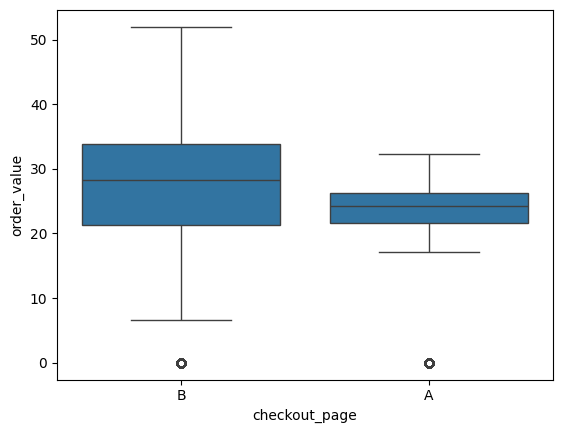

              user_id   order_value                                       
              nunique           sum       mean     median        std count
checkout_page                                                             
A                2750  57501.897808  20.492480  24.260905   9.815997  2806
B                2770  71985.716311  25.427664  28.257795  12.595728  2831
The mean value in order in Page A is $20.49247961799502
The mean value in order in Page B is $25.427663832759446


In [156]:
data_unique, page_a_order_value, page_b_order_value, mean_a, mean_b, std_a, std_b, count_a, count_b = preprocessing_data(prior_data)

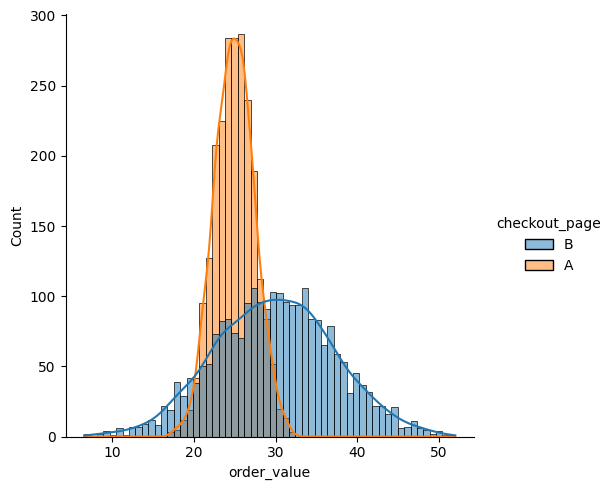

In [157]:
#fig, axs = plt.subplots(1, 2, sharey=True, tight_layout=True)

#Manter apenas valores que são maiores que 0
data_unique = data_unique[data_unique["order_value"]>0]

sns.displot(data=data_unique, x="order_value", hue="checkout_page", kde=True)

### Shapiro-Wilk test for Normality

In [158]:
from scipy.stats import ttest_ind, mannwhitneyu, shapiro

# Verificação da normalidade
_, p_shapiro_a = shapiro(page_a_order_value)
_, p_shapiro_b = shapiro(page_b_order_value)

print(f"P-valor Shapiro-Wilk Grupo A: {p_shapiro_a:.4f}")
print(f"P-valor Shapiro-Wilk Grupo B: {p_shapiro_b:.4f}")

P-valor Shapiro-Wilk Grupo A: 0.0000
P-valor Shapiro-Wilk Grupo B: 0.0000


In [160]:
print(f"P-value Shapiro-Wilk Group A: {p_shapiro_a:.4f}")
print(f"P-value Shapiro-Wilk Group B: {p_shapiro_b:.4f}")

if p_shapiro_a > 0.05 and p_shapiro_b > 0.05:
    # If both are normal, use T-test
    t_stat, p_value = ttest_ind(page_a_order_value, page_b_order_value)
    print(f"T-statistic: {t_stat:.4f}, P-value: {p_value:.4f} (T-test)")
else:
    # If not normal, use Mann-Whitney U test
    u_stat, p_value = mannwhitneyu(page_a_order_value, page_b_order_value)
    print(f"U-statistic: {u_stat}, P-value: {p_value:.4f} (Mann-Whitney U)")

# Checking if the difference is significant
if p_value < 0.05:
    print(f"The difference in order values between pages A and B is statistically significant.")
    
    # Checking which page has the higher mean value
    if mean_a > mean_b:
        print("The average order value on page A is higher than on page B.")
    else:
        print("The average order value on page B is higher than on page A.")
else:
    print("There is no statistically significant difference in order values between pages A and B.")


P-value Shapiro-Wilk Group A: 0.0000
P-value Shapiro-Wilk Group B: 0.0000
U-statistic: 2544435.0, P-value: 0.0000 (Mann-Whitney U)
The difference in order values between pages A and B is statistically significant.
The average order value on page B is higher than on page A.


### Bayes Inferece (A/B Test)- Part 2:

<class 'pandas.core.frame.DataFrame'>
Index: 114 entries, 1162 to 212
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     114 non-null    int64  
 1   user_id        114 non-null    int64  
 2   checkout_page  114 non-null    object 
 3   order_value    93 non-null     float64
 4   purchased      114 non-null    float64
 5   gender         114 non-null    object 
 6   browser        114 non-null    object 
 7   time_on_page   114 non-null    float64
dtypes: float64(3), int64(2), object(3)
memory usage: 8.0+ KB
None
The number of values by page: checkout_page
A    68
B    46
Name: count, dtype: int64
checkout_page
1    114
Name: count, dtype: int64
Número de clientes que visitaram apenas uma página de checkout: 114
checkout_page
A    68
B    46
Name: count, dtype: int64


C:\Users\danrl\AppData\Local\Temp\ipykernel_2392\1621255205.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.fillna(0, inplace=True)


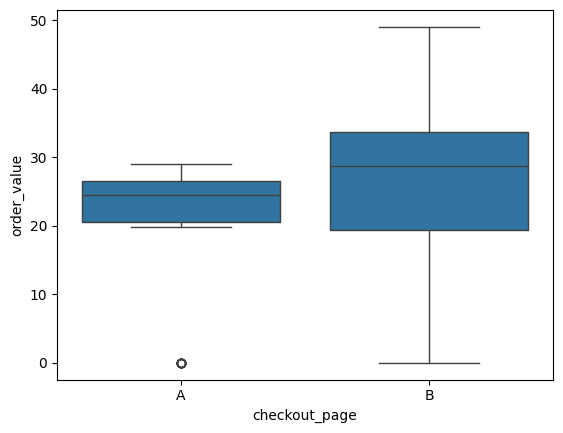

              user_id  order_value                                       
              nunique          sum       mean     median        std count
checkout_page                                                            
A                  68  1347.959410  19.822933  24.535539  10.391866    68
B                  46  1164.259528  25.309990  28.787840  13.208639    46
The mean value in order in Page A is $19.822932506862287
The mean value in order in Page B is $25.30998974080447


In [161]:
observed_data_unique, observed_page_a_order_value, observed_page_b_order_value, observed_mean_a, observed_mean_b, observed_std_a, observed_std_b, observed_count_a, observed_count_b = preprocessing_data(observed_data)

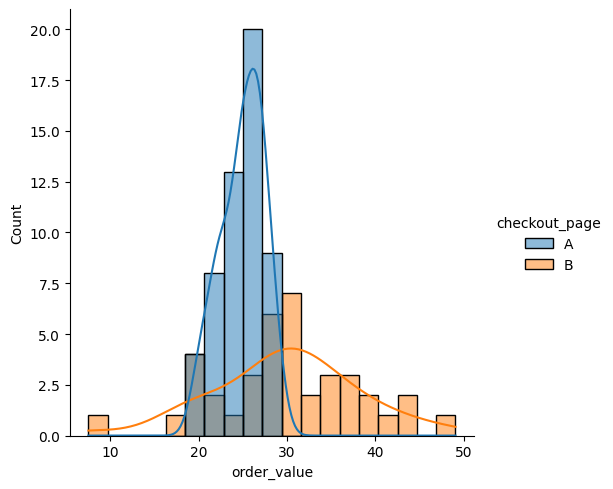

In [163]:
#fig, axs = plt.subplots(1, 2, sharey=True, tight_layout=True)

#Manter apenas valores que são maiores que 0
observed_data_unique = observed_data_unique[observed_data_unique["order_value"]>0]

sns.displot(data=observed_data_unique, x="order_value", hue="checkout_page", kde=True)

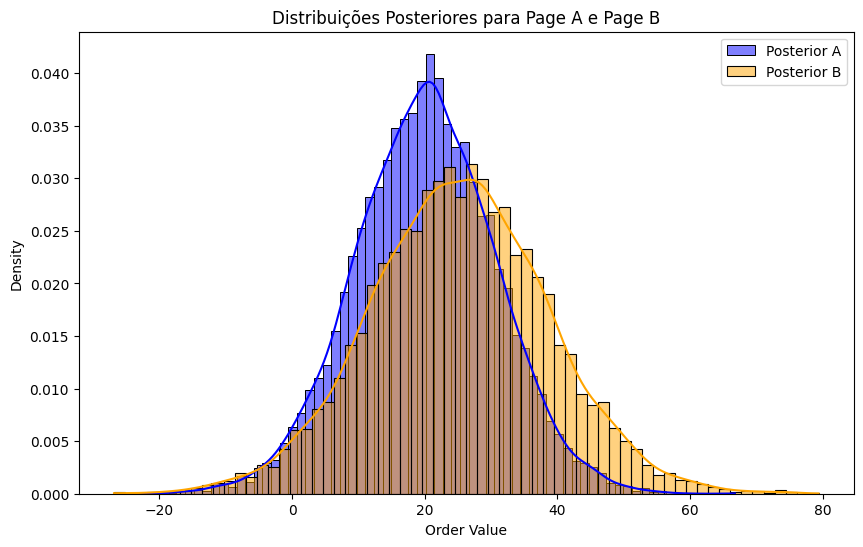

In [165]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

# Utilizando os dados conhecidos do primeiro experimento:
# data_unique, page_a_order_value, page_b_order_value, mean_a, mean_b, std_a, std_b, count_a, count_b

# Definindo priors para ambas as páginas
prior_mean_a = mean_a
prior_scale_a = std_a

prior_mean_b = mean_b
prior_scale_b = std_b


# Função para calcular a posteriori usando distribuição t-Student
def calculate_posterior_t(data, prior_mean, prior_scale, nu=3):
    """
    data: valores dos pedidos (amostra observada)
    prior_mean: média a priori
    prior_scale: escala a priori (desvio padrão)
    nu: graus de liberdade da t-Student
        - Graus de liberdade (nu) controlam a forma da distribuição t-Student.
        - Um valor baixo de nu (como 3) reflete maior incerteza e caudas pesadas, permitindo a modelagem de dados com maior variabilidade ou valores extremos.
        - Um valor alto de nu aproxima a distribuição de uma normal, indicando menos incerteza sobre a variância dos dados.
    """
    # Parâmetros da amostra observada
    n = len(data)
    sample_mean = np.mean(data)
    sample_variance = np.var(data, ddof=1)

    # Atualizando os parâmetros da posteriori
    
    # Posterior degrees of freedom
    posterior_nu = nu + n
    
    #Posterior Mean (μ_post): # A média posterior é uma média ponderada entre a média da amostra e a priori.
    posterior_mean = (prior_scale * prior_mean + n * sample_mean) / (prior_scale + n)
    
    # Posterior Variance (σ²_post): # Esse termo incorpora tanto a variância amostral quanto a incerteza da priori.
    posterior_scale = np.sqrt((prior_scale**2 * nu + n * sample_variance) / posterior_nu)

    # Gerando amostras da posteriori
    posterior_samples = stats.t(df=posterior_nu, loc=posterior_mean, scale=posterior_scale).rvs(10000)
    
    return posterior_samples


# Calculando as posteriores
posterior_a = calculate_posterior_t(observed_page_a_order_value, prior_mean_a, prior_scale_a)
posterior_b = calculate_posterior_t(observed_page_b_order_value, prior_mean_b, prior_scale_b)

# Plotando as distribuições posteriores
plt.figure(figsize=(10, 6))
sns.histplot(posterior_a, kde=True, color='blue', label='Posterior A', stat='density')
sns.histplot(posterior_b, kde=True, color='orange', label='Posterior B', stat='density')
plt.title('Distribuições Posteriores para Page A e Page B')
plt.xlabel('Order Value')
plt.ylabel('Density')
plt.legend()
plt.show()

In [166]:
from IPython.display import display, Math

# Displaying the formulas in LaTeX
display(Math(r'\nu_{post} = \nu_0 + n'))
display(Math(r'\mu_{post} = \frac{\nu_0 \mu_0 + n \bar{x}}{\nu_0 + n}'))
display(Math(r'\sigma^2_{post} = \frac{1}{\nu_{post}} \left[ \nu_0 \sigma_0^2 + \sum_{i=1}^{n} (x_i - \bar{x})^2 + \frac{n \nu_0}{\nu_0 + n} (\bar{x} - \mu_0)^2 \right]'))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

### Distribuição das diferenças:

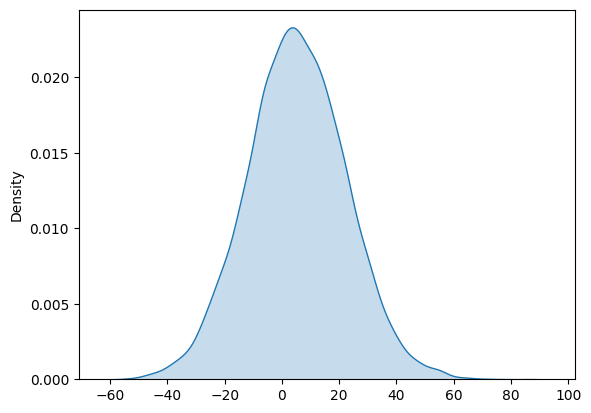

In [167]:
posterior_difference = posterior_b - posterior_a
sns.kdeplot(posterior_difference, fill=True, label="Posterior Difference")
plt.show()

### Intervalo de credibilidade:

In [168]:
import arviz as az

# Calculando o HDI de 90%
hdi_interval = az.hdi(posterior_difference, hdi_prob=0.9)
print(f"HDI (90%): {hdi_interval}")

HDI (90%): [-22.39439178  33.89580623]


### Probabilidade de uma página ser melhor:
Calcule a probabilidade de a página B ser melhor (diferença > 0):

In [169]:
prob_b_better = np.mean(posterior_difference > 0)
print(f"Probabilidade de B ser melhor: {prob_b_better:.2%}")

Probabilidade de B ser melhor: 61.58%


### Perda esperada:
A perda esperada é a média das diferenças negativas:

In [171]:
expected_loss = np.mean(np.minimum(posterior_difference, 0))
print(f"Perda esperada ao escolher a página errada: {expected_loss}")

Perda esperada ao escolher a página errada: -4.555062725732629


### Interpretação dos Resultados:
#### Intervalo de Credibilidade (90% HDI):
A diferença no valor médio dos pedidos entre as páginas A e B está entre -21,64 e 30,33. Como o intervalo inclui valores negativos e positivos, não há uma evidência clara e definitiva de que uma página seja consistentemente melhor que a outra.

#### Probabilidade de B ser melhor (61,66%):
Existe uma probabilidade de 61,66% de que a página B seja melhor (ou tenha maior valor médio de pedidos) do que a página A. Isso indica uma leve vantagem para B, mas não é altamente conclusivo.

#### Perda Esperada (-4,31):
A perda esperada ao escolher a página errada é de aproximadamente **4,31 unidades monetárias**. Isso significa que, se você optar pela página A quando B for realmente melhor (ou vice-versa), essa é a perda média esperada por pedido.

#### Interpretação Prática da Perda:
- Se você optar por A e B for melhor: Você perde aproximadamente 4,31 unidades monetárias por pedido. Isso sugere que, ao longo de muitos pedidos, essa perda pode se acumular.
- A decisão de mudar para a página B depende se essa perda esperada justifica o custo operacional e estratégico da mudança. Por exemplo, se o volume de pedidos for alto, essa perda acumulada pode ser significativa, reforçando a necessidade de uma análise mais profunda.

#### Contextos em que isso é relevante:
- Cenários de alto volume de pedidos: Mesmo uma pequena perda por pedido pode representar um impacto significativo em receitas totais.
- Marketing e otimização de conversões: Entender a perda esperada ajuda a decidir entre campanhas ou estratégias de checkout diferentes.
- Trade-offs de custos e ganhos: Avaliar se a perda esperada justifica investimentos em nova implementação.

### ---------------------------------------- // --------------------------------------------------------

Analisando o gráfico e os resultados que você forneceu, o que podemos concluir sobre a comparação entre as páginas A e B:

Distribuição dos valores de "order_value": O gráfico mostra que a distribuição dos valores de pedidos na página B parece ser mais concentrada em valores mais altos do que na página A, indicando que os clientes que acessam a página B tendem a gastar mais. Isso sugere que a página B pode ser mais lucrativa.

Significância estatística: Se as médias entre os dois grupos (página A e página B) forem estatisticamente significativas (com base no seu teste T ou Mann-Whitney U, dependendo do comportamento dos dados), isso indica que a diferença observada entre os valores médios de pedido nas duas páginas não é devido ao acaso.

O que você pode afirmar com base nisso:
Se o p-valor do Teste T foi significativo (menor que 0,05), você pode afirmar que há uma diferença estatisticamente significativa entre as duas páginas no que se refere aos valores de pedido.
Se a distribuição da página B tende a ter valores mais altos (como mostra o gráfico) e essa diferença é significativa, então você pode concluir que a página B tem, em média, valores de pedidos mais altos, o que sugere que ela é mais lucrativa em comparação à página A.
Porém, algumas considerações importantes:
A média é apenas uma medida de tendência central e, embora tenha mostrado que a página B tende a ter valores de pedidos mais altos, seria bom também considerar a variabilidade ou dispersão (como o desvio padrão ou outros testes de robustez) para entender a consistência desses resultados.
Interpretação prática: Mesmo que a média de pedidos da página B seja significativamente maior, é importante entender o contexto do seu teste A/B e se esse aumento no valor do pedido realmente representa um aumento no lucro líquido ou se outros fatores (como a conversão ou custos adicionais associados à página B) precisam ser considerados.
Se você precisar de mais esclarecimentos ou de ajuda com uma análise mais detalhada, estou à disposição!







Você disse:
Maravilha, mas de toda forma este nosso teste dá alguns indícios que a página B tende a estar sendo melhor em resultados financeiros do que a página A, estatisticamente falando, sem considerar outros fatores de custos.
O ChatGPT disse:
ChatGPT
Exatamente! O teste estatístico e o gráfico fornecem indícios claros de que, estatisticamente falando, a página B tem um desempenho melhor em termos de valores de pedidos (como indicado pelas médias mais altas e pela diferença significativa). Isso sugere que a página B está gerando resultados financeiros melhores quando comparamos as duas.

Resumo dos principais pontos:
Distribuição dos valores de pedidos: O gráfico mostra que a página B tende a ter valores de pedidos mais altos em comparação com a página A.
Teste de significância: Se o p-valor foi abaixo de 0,05, isso confirma que a diferença observada entre os grupos A e B não é resultado do acaso, ou seja, a diferença nas médias de valores de pedidos é significativa.
Portanto, com base nos resultados estatísticos e na análise das distribuições, você pode afirmar que a página B, ao menos sob a ótica da métrica de "order_value", está performando melhor. No entanto, como você bem mencionou, seria importante considerar outros fatores, como custos e a conversão geral de visitantes, para ter uma visão completa da lucratividade real entre as páginas.

Mas, para fins dessa análise específica, sim, a página B parece ser a mais lucrativa.

## Em quais circunstâncias então seria interessante aplicar o método bayesiano? 

Quando é interessante aplicar o método bayesiano em testes A/B e análises estatísticas:
1. Quando há incerteza sobre os dados ou amostras pequenas
O método bayesiano permite incorporar conhecimento prévio (priors), o que ajuda a estabilizar estimativas em cenários com poucos dados ou quando os dados são altamente voláteis.
Exemplo: Se você tem poucos cliques ou vendas em um teste A/B e quer evitar conclusões precipitadas com base em variabilidade alta.
Cenário prático:
Um teste de conversão com apenas 100 visitantes pode se beneficiar de uma prior que reflita o conhecimento prévio sobre taxas de conversão típicas (ex: entre 2% e 5%).

2. Quando você quer incorporar conhecimento prévio relevante
Se você tem dados históricos ou conhecimento especializado sobre o comportamento das métricas, o método bayesiano permite usar isso como base.
Exemplo: Se campanhas anteriores mostram que o valor médio de uma compra gira em torno de 20, uma prior Beta ou Normal pode ser incorporada para modelar novas campanhas.
3. Quando deseja trabalhar com distribuições completas e não apenas estimativas pontuais
O método bayesiano fornece distribuições completas das métricas (como taxas de conversão), em vez de valores médios, o que ajuda a entender melhor a variabilidade e o risco.
Exemplo: Em vez de dizer que a conversão média é 3%, você sabe que há 80% de chance de estar entre 2% e 4%, o que melhora a tomada de decisão.

4. Quando precisa calcular o risco e a perda esperada
O método bayesiano permite calcular a perda esperada diretamente, considerando a distribuição das diferenças entre alternativas.
Exemplo: Decidir entre duas versões de um site onde uma tem maior conversão, mas maior variabilidade. O método ajuda a avaliar o trade-off entre ganho e risco.

6. Quando quer fazer atualizações dinâmicas dos resultados com novos dados
O método bayesiano permite atualizar continuamente os resultados à medida que novos dados chegam, sem precisar rodar o teste do zero.
Exemplo: Monitoramento contínuo de um teste A/B ao longo do tempo, com atualizações diárias.

7. Quando as distribuições das métricas não seguem distribuições comuns (como Normal)
Se as métricas têm distribuições assimétricas ou não Gaussianas, o método bayesiano pode usar distribuições flexíveis para modelar esses casos.
Exemplo: Taxas de churn (cancelamento) em um serviço de assinatura, que muitas vezes seguem distribuições altamente assimétricas.

8. Quando quer comunicar resultados em termos probabilísticos (credibilidade)
Os resultados bayesianos são mais intuitivos para decisões, pois informam diretamente a probabilidade de uma alternativa ser melhor.
Exemplo: Dizer que há 90% de chance da versão B ser melhor que a versão A é mais útil do que simplesmente reportar um p-valor.

Imagine que você está testando duas versões de uma página de checkout com 500 visitas em cada grupo:

Frequentista: Você calcula a diferença média nas taxas de conversão e um p-valor.
Bayesiano: Você calcula a probabilidade de cada versão ser melhor e a perda esperada caso escolha a pior.
Se o seu objetivo é minimizar riscos e trabalhar com probabilidades claras, o método bayesiano é superior.